In [1]:
!pip install ipwhois

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from ipwhois import IPWhois

In [3]:
df = pd.read_csv("Data_3.csv",names=range(21))

In [4]:
df.dtypes

0      object
1      object
2       int64
3       int64
4      object
5      object
6      object
7       int64
8       int64
9      object
10     object
11      int64
12     object
13      int64
14      int64
15      int64
16     object
17      int64
18      int64
19      int64
20    float64
dtype: object

In [5]:
# drop the CNTR counter samples
# reset the indexes
# drop the last NaN column
dfC= df[df[0]=='FLOW']
dfC.reset_index(inplace=True,drop=True)
dfC.dropna(axis=1,inplace=True)
dfC

C:\Users\TdrDi\AppData\Local\Temp\ipykernel_10716\822251700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC.dropna(axis=1,inplace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68060,FLOW,203.30.38.251,258,199,204e71cf1b0f,ccef48570144,0x0800,537,601,207.241.228.157,210.48.222.9,6,0x00,56,443,57434,0x10,1522,1500,2048
68061,FLOW,203.30.38.251,131,193,00a742233e9e,0031466b23cf,0x0800,43,919,192.122.131.36,216.58.203.234,6,0x00,121,4920,443,0x10,1442,1420,2048
68062,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,34153,3123,0x10,82,64,2048
68063,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.196.9,74.125.56.6,17,0x00,58,56221,60786,0x10,1267,1245,2048


In [6]:
# append column names
column_names = ['type',
                'sflow_agent_addr',
                'inputPort',
                'outputPort',
                'src_MAC',
                'dst_MAC',
                'ethernet_type',
                'in_vlan',
                'out_vlan',
                'src_IP',
                'dst_IP',
                'IP_protocol',
                'ip_tos',
                'ip_ttl',
                'TRANSPORT_src_port',
                'TRANSPORT_dst_port',
                'tcp_flags',
                'packet_size',
                'IP_size',
                'sampling_rate']
dfC.columns = column_names
dfC

,type,sflow_agent_addr,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,TRANSPORT_src_port,TRANSPORT_dst_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68060,FLOW,203.30.38.251,258,199,204e71cf1b0f,ccef48570144,0x0800,537,601,207.241.228.157,210.48.222.9,6,0x00,56,443,57434,0x10,1522,1500,2048
68061,FLOW,203.30.38.251,131,193,00a742233e9e,0031466b23cf,0x0800,43,919,192.122.131.36,216.58.203.234,6,0x00,121,4920,443,0x10,1442,1420,2048
68062,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,34153,3123,0x10,82,64,2048
68063,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.196.9,74.125.56.6,17,0x00,58,56221,60786,0x10,1267,1245,2048


In [7]:
dfC.dtypes

type                  object
sflow_agent_addr      object
inputPort              int64
outputPort             int64
src_MAC               object
dst_MAC               object
ethernet_type         object
in_vlan                int64
out_vlan               int64
src_IP                object
dst_IP                object
IP_protocol            int64
ip_tos                object
ip_ttl                 int64
TRANSPORT_src_port     int64
TRANSPORT_dst_port     int64
tcp_flags             object
packet_size            int64
IP_size                int64
sampling_rate          int64
dtype: object

In [8]:
# convert all the columns with object type into string
for col in dfC:
    if dfC[col].dtype == 'object':
        dfC[col] = dfC[col].astype("string") 
dfC.dtypes

C:\Users\TdrDi\AppData\Local\Temp\ipykernel_10716\1519574019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC[col] = dfC[col].astype("string")


type                  string
sflow_agent_addr      string
inputPort              int64
outputPort             int64
src_MAC               string
dst_MAC               string
ethernet_type         string
in_vlan                int64
out_vlan               int64
src_IP                string
dst_IP                string
IP_protocol            int64
ip_tos                string
ip_ttl                 int64
TRANSPORT_src_port     int64
TRANSPORT_dst_port     int64
tcp_flags             string
packet_size            int64
IP_size                int64
sampling_rate          int64
dtype: object

# 4a


In [9]:
def findOrg(ipAddr):
    """
    function that calls IPWhois to return the organization information as a dictionary
    """
    ipwhois = IPWhois(ipAddr)
    try:
        org = ipwhois.lookup_rdap()
    except:
        org = None
    return org
        

In [10]:
# get top 5 talkers
top_5_talkers = dfC['src_IP'].value_counts().head(5)


# find organisation names of top 5 talkers
org_list = [findOrg(index)['asn_description'] for index in top_5_talkers.index]

# append data together
top_5_talkers = pd.DataFrame(top_5_talkers).reset_index()
top_5_talkers.columns = ['src_IP','Number of packets']
top_5_talkers['Organisation'] = org_list
top_5_talkers

,src_IP,Number of packets,Organisation
0,193.62.192.8,3041,"JANET Jisc Services Limited, GB"
1,155.69.160.32,2975,"NTU-AS-AP Nanyang Technological University, SG"
2,130.14.250.11,2604,"NLM-GW, US"
3,14.139.196.58,2452,"NKN-EDGE-NW NKN EDGE Network, IN"
4,140.112.8.139,2056,"NTU-TW National Taiwan University, TW"


<AxesSubplot:xlabel='Number of packets', ylabel='Organisation'>

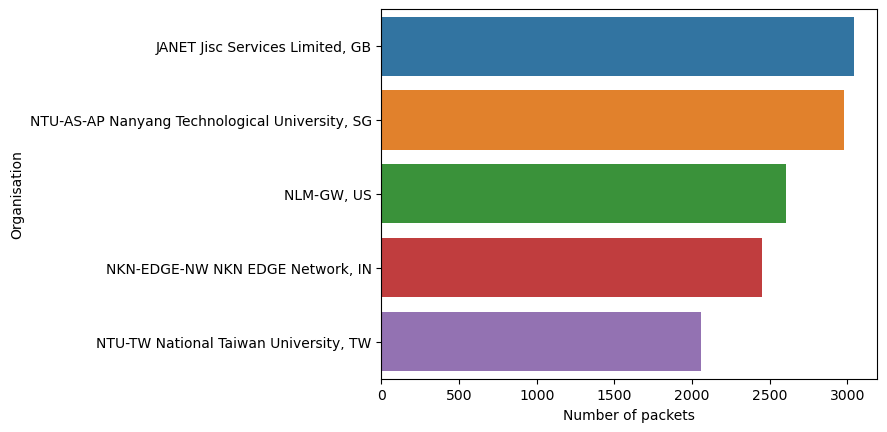

In [11]:
sns.barplot(data=top_5_talkers,x='Number of packets',y='Organisation')

In [12]:
# get top 5 listeners
top_5_listeners = dfC['dst_IP'].value_counts().head(5)


# find organisation names of top 5 talkers
org_list = [findOrg(index)['asn_description'] for index in top_5_listeners.index]

# append data together
top_5_listeners = pd.DataFrame(top_5_listeners).reset_index()
top_5_listeners.columns = ['dst_IP','Number of packets']
top_5_listeners['Organisation'] = org_list
top_5_listeners

,dst_IP,Number of packets,Organisation
0,103.37.198.100,3841,"A-STAR-AS-AP A-STAR, SG"
1,137.132.228.15,3715,"NUS-AS-AP NUS Information Technology, SG"
2,202.21.159.244,2446,REPUBLICPOLYTECHNIC-AS Republic Polytechnic. M...
3,192.101.107.153,2368,"ESNET-AS, US"
4,103.21.126.2,2056,"IITB-IN Powai, IN"


<AxesSubplot:xlabel='Number of packets', ylabel='Organisation'>

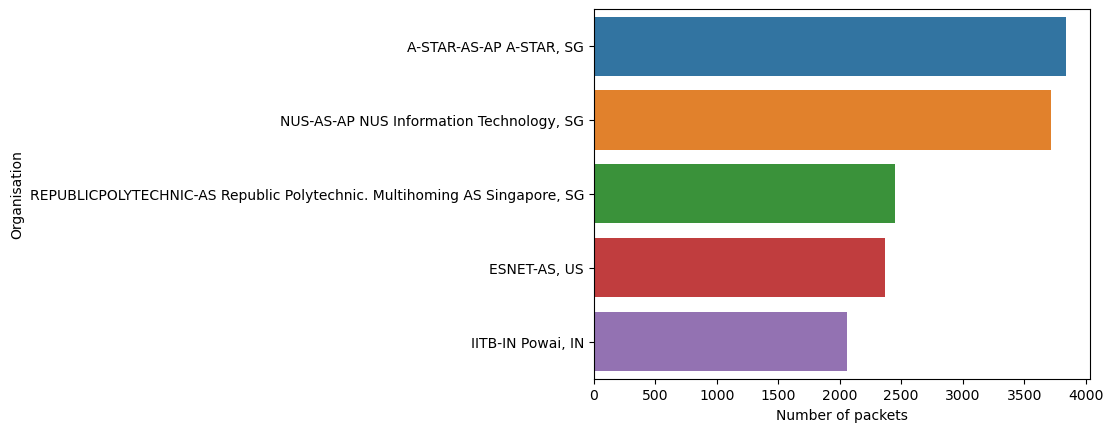

In [13]:
sns.barplot(data=top_5_listeners,x='Number of packets',y='Organisation')

# 4b

In [14]:
# get ranked list of most common transport protocol in IP header
transport_layer_protocol = dfC['IP_protocol'].value_counts(normalize = False)
transport_layer_protocol = pd.DataFrame(transport_layer_protocol).reset_index()
transport_layer_protocol.columns = ['IP_protocol','Number of packets']
transport_layer_protocol.head(5)

,IP_protocol,Number of packets
0,6,56064
1,17,9462
2,50,1698
3,47,657
4,41,104


Finding out the mapping for the name of the transport layer protocol to the protocol number in the IP packet header <br>
6: Transmission Control Protocol (TCP) <br>
17: User Datagram Protocol (UDP) <br>
50: Encapsulating Security Payload (ESP) <br>
47: Generic Routing Encapsulation (GRE) <br>
41: IPv6 Encapsulation (IPv6) <br>

In [15]:
transport_layer_protocol['IP_protocol'] = transport_layer_protocol['IP_protocol'].replace({6:'TCP',
                                                                              17:'UDP',
                                                                              50:'ESP',
                                                                              47:'GRE',
                                                                              41:'IPv6'})
transport_layer_protocol.head(5)

,IP_protocol,Number of packets
0,TCP,56064
1,UDP,9462
2,ESP,1698
3,GRE,657
4,IPv6,104


<AxesSubplot:xlabel='IP_protocol', ylabel='Number of packets'>

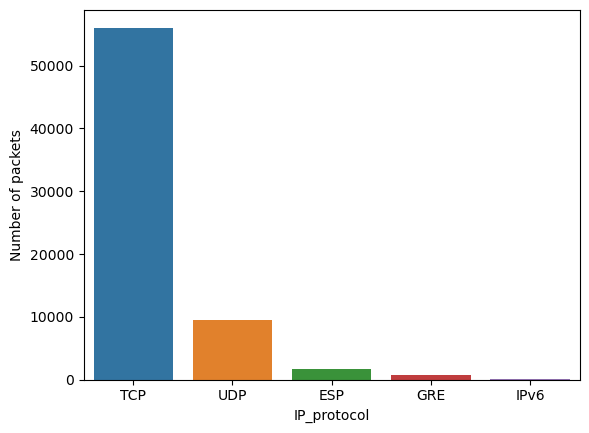

In [16]:
sns.barplot(data=transport_layer_protocol.head(5),x='IP_protocol',y='Number of packets')

In [17]:
# get ranked list of most common transport protocol in IP header by percentage
transport_layer_protocol_norm = dfC['IP_protocol'].value_counts(normalize = True)
transport_layer_protocol_norm = pd.DataFrame(transport_layer_protocol_norm).reset_index()
transport_layer_protocol_norm.columns = ['IP_protocol','Percentage of packets']
transport_layer_protocol_norm['Percentage of packets'] =transport_layer_protocol_norm['Percentage of packets'].apply(lambda x: x*100)
transport_layer_protocol_norm.head(5)

,IP_protocol,Percentage of packets
0,6,82.368324
1,17,13.901418
2,50,2.494674
3,47,0.965254
4,41,0.152795


Finding out the mapping for the name of the transport layer protocol to the protocol number in the IP packet header <br>
6: Transmission Control Protocol (TCP) <br>
17: User Datagram Protocol (UDP) <br>
50: Encapsulating Security Payload (ESP) <br>
47: Generic Routing Encapsulation (GRE) <br>
41: IPv6 Encapsulation (IPv6) <br>

In [18]:
transport_layer_protocol_norm['IP_protocol'] = transport_layer_protocol_norm['IP_protocol'].replace({6:'TCP',
                                                                              17:'UDP',
                                                                              50:'ESP',
                                                                              47:'GRE',
                                                                              41:'IPv6'})
transport_layer_protocol_norm.head(5)

,IP_protocol,Percentage of packets
0,TCP,82.368324
1,UDP,13.901418
2,ESP,2.494674
3,GRE,0.965254
4,IPv6,0.152795


<AxesSubplot:xlabel='IP_protocol', ylabel='Percentage of packets'>

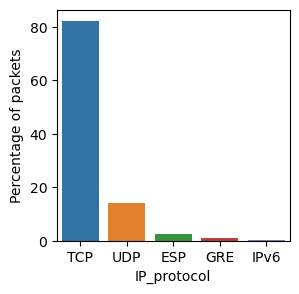

In [74]:
plt.figure(figsize=(3, 3))
sns.barplot(data=transport_layer_protocol_norm.head(5),x='IP_protocol',y='Percentage of packets')

# 4c

In [20]:
# get ranked list of most common application protocol in IP header
app_layer_protocol = dfC['TRANSPORT_dst_port'].value_counts(normalize = False)
app_layer_protocol = pd.DataFrame(app_layer_protocol).reset_index()
app_layer_protocol.columns = ['Application_protocol','Number of packets']
app_layer_protocol.head(5)

,Application_protocol,Number of packets
0,443,13423
1,80,2647
2,52866,2068
3,45512,1356
4,56152,1341


Finding out the mapping for the name of the application layer protocol to the transport port number in the IP packet header from [here](https://www.adminsub.net/tcp-udp-port-finder) <br>
443: Hypertext Transfer Protocol over SSL/TLS (HTTPS) <br>
80: Hypertext Transfer Protocol (HTTP) <br>
52866: Dynamic and/or Private Ports <br>
45512: Unassigned <br>
56152: Dynamic and/or Private Ports <br>

In [21]:
app_layer_protocol['Application_protocol'] = app_layer_protocol['Application_protocol'].replace({443:'HTTPS',
                                                                              80:'HTTP',
                                                                              52866:'Dynamic/Private Ports',
                                                                              45512:'Unassigned',
                                                                              56152:'Dynamic/Private Ports'})
app_layer_protocol.head(5)

,Application_protocol,Number of packets
0,HTTPS,13423
1,HTTP,2647
2,Dynamic/Private Ports,2068
3,Unassigned,1356
4,Dynamic/Private Ports,1341


<AxesSubplot:xlabel='Application_protocol', ylabel='Number of packets'>

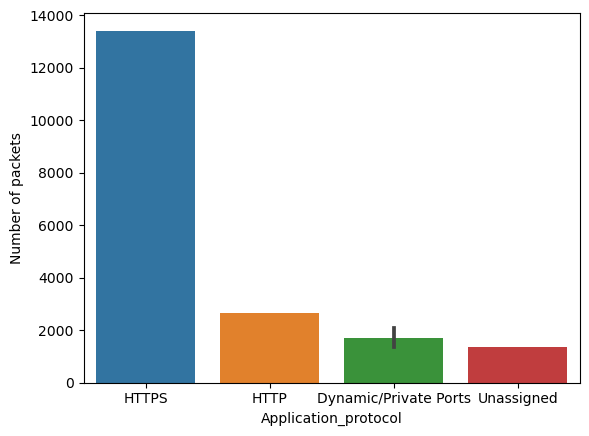

In [75]:
sns.barplot(data=app_layer_protocol.head(5),x='Application_protocol',y='Number of packets')

# 4d

Since all packets in the entire dataset are over the span of 15 seconds, the sum of the size of all IP packets would only give us 1/2048 of the total traffic, on average, since sampling rate is 2048 meaning only one in every 2048 packets are sampled.
The packet size given in IP header is in Bytes.

In [23]:
print("Estimated Total traffic size is")
print(dfC['IP_size'].sum() * 2048, " Bytes")
print((dfC['IP_size'].sum() * 2048)/2**20, " MB")
print()
print("Traffic intensity is")
print((dfC['IP_size'].sum() * 2048)/(15* (2**20)), " MB per second")

Estimated Total traffic size is
132664979456  Bytes
126519.18359375  MB

Traffic intensity is
8434.612239583334  MB per second


# 4e


In [24]:
import networkx as nx
import matplotlib.pyplot as plt

Top 5 communication pairs visualized

In [66]:
communication_pairs = dfC.groupby(["src_IP", "dst_IP"]).size().sort_values(ascending=False)
communication_pairs.head(5)

src_IP          dst_IP         
193.62.192.8    137.132.228.15     3041
130.14.250.11   103.37.198.100     2599
14.139.196.58   192.101.107.153    2368
140.112.8.139   103.21.126.2       2056
137.132.228.15  193.62.192.8       1910
dtype: int64

Visualization of communications between different IP hosts

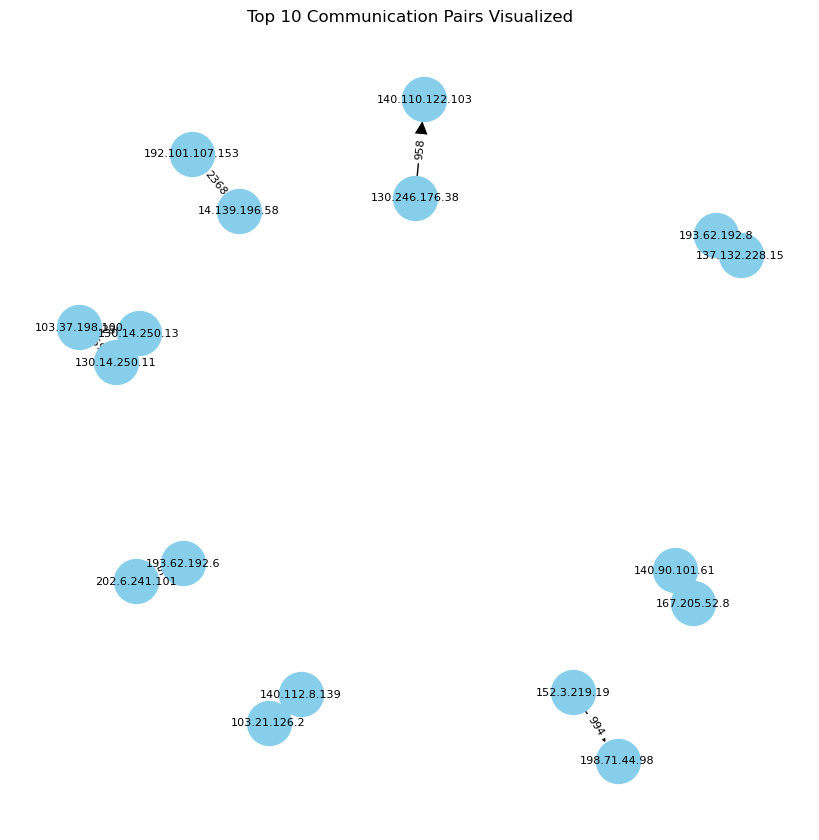

In [67]:
communication_pairs = dfC.groupby(["src_IP", "dst_IP"]).size().reset_index(name='count')
top_10_pairs = communication_pairs.sort_values('count', ascending=False).head(10)

# Create a directed graph from the filtered dataframe
G_filtered = nx.from_pandas_edgelist(top_10_pairs, "src_IP", "dst_IP", create_using=nx.DiGraph())

# Draw the filtered graph with node labels
pos_filtered = nx.spring_layout(G_filtered, seed=42)
plt.figure(figsize=(8, 8))
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=1000, node_color="skyblue", arrowsize=20, font_size=8)

# Add edge labels with packet count
edge_labels_filtered = {(src_IP, dst_IP): top_10_pairs[(top_10_pairs["src_IP"] == src_IP) & (top_10_pairs["dst_IP"] == dst_IP)].get('count').iloc[0] for src_IP, dst_IP in G_filtered.edges()}
#edge_labels_filtered = {(src_IP, dst_IP): top_10_pairs[(top_10_pairs["src_IP"] == src_IP) & (top_10_pairs["dst_IP"] == dst_IP)].shape[0] for src_IP, dst_IP in G_filtered.edges()}
nx.draw_networkx_edge_labels(G_filtered, pos_filtered, edge_labels=edge_labels_filtered, font_size=8)

plt.title("Top 10 Communication Pairs Visualized")
plt.show()
